# Packages

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Importation des données

In [2]:
df = pd.read_csv("2025-08-MD.csv")

In [3]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


We have 127 variables. We need to verify if the date est de 1959 to 2025 par ordre de mensualité. After that, let's check if our interested variables are on the dataset. 

# 2. Verify the frequence and the date of time series

In [4]:
# Drop the row of transform
df = df.iloc[2:].reset_index(drop=True)
print(df.head())

    sasdate       RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
0  2/1/1959  2593.596   2434.8           15.346  278713.9773  17819.01912   
1  3/1/1959  2610.396   2452.7           15.491  277775.2539  17967.91336   
2  4/1/1959  2627.446   2470.0           15.435  283362.7075  17978.97983   
3  5/1/1959  2642.720   2486.4           15.622  285307.2201  18119.82573   
4  6/1/1959  2650.841   2493.9           15.679  285279.5930  18284.81665   

    INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
0  22.3917  23.7024  22.4549  31.8987  ...           18.302           10.167   
1  22.7142  23.8459  22.5651  31.8987  ...           18.289           10.185   
2  23.1981  24.1903  22.8957  32.4019  ...           18.300           10.221   
3  23.5476  24.3911  23.1161  32.5567  ...           18.280           10.238   
4  23.5744  24.5633  23.2814  32.4019  ...           18.321           10.275   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx

In [5]:
# Let us make the date as index
df.sasdate
df.sasdate = pd.to_datetime(df.sasdate)
df = df.set_index(df.sasdate)
df = df.drop("sasdate", axis=1)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-02-01,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN
1959-06-01,2650.841,2493.9,15.679,285279.5930,18284.81665,23.5744,24.5633,23.2814,32.4019,20.0937,...,18.321,10.275,2.17,2.50,2.09,NaN,6956.0,12926.0,78.6972,NaN


In [6]:
# Beginning and the end of the time series
print(df.index[0])
print(df.index[-1])

1959-02-01 00:00:00
2025-07-01 00:00:00


We observe that the dataset is vary 1959 to 2025. We normaly find the frequence of quaterly.

In [7]:
pd.infer_freq(df.index)

'MS'

The quarterly periods starting in December. 

# Les variables à retenir

In [ ]:
col_names = ["UNRATE", 
             # Unemployement
              "TB3MS", # 3-month treasury bill
                "RPI", # Industrial personal income
                "INDPRO", # Industrial production
                "DPCERA3M086SBEA", # Consumption
                "S&P 500", # S&P 500
                "BUSLOANS", # BUSLOANS
                "CPIAUCSL", # CPIAUCSL
                "OILPRICEx", # OILPRICEx
                "M2SL"] # M2SL

df = df[col_names]

In [10]:
print(df.columns.tolist())

['UNRATE', 'TB3MS', 'RPI', 'INDPRO', 'DPCERA3M086SBEA', 'S&P 500', 'BUSLOANS', 'CPIAUCSL', 'OILPRICEx', 'M2SL']


In [12]:
df.head()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
sasdate,,,,,,,,,,
1959-02-01,5.9,2.70,2593.596,22.3917,15.346,54.77,35.2201,29.00,3.00,287.7
1959-03-01,5.6,2.80,2610.396,22.7142,15.491,56.16,35.1304,28.97,2.97,289.2
1959-04-01,5.2,2.95,2627.446,23.1981,15.435,57.10,35.5581,28.98,2.97,290.1
1959-05-01,5.1,2.84,2642.720,23.5476,15.622,57.96,36.3064,29.04,2.97,292.2
1959-06-01,5.0,3.21,2650.841,23.5744,15.679,57.46,37.1404,29.11,2.97,294.1


# Let's have a look of indicators

In [14]:
df.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,5.865789,4.363722,9675.545741,68.057303,57.326596,1000.921516,873.255470,140.626298,33.482321,5580.911905
std,1.686784,3.111710,5139.657856,26.912013,31.171668,1284.540011,808.507341,84.966376,29.751059,5944.125979
min,3.400000,0.010000,2593.596000,22.042200,15.346000,53.730000,35.130400,28.970000,2.920000,287.700000
25%,4.600000,2.122500,5161.658500,45.096325,29.182500,101.225000,183.431700,54.675000,11.160000,993.075000
50%,5.600000,4.470000,8501.858000,63.023350,49.381500,412.530000,621.503200,139.550000,22.292500,3398.700000
75%,6.900000,5.825000,13789.318750,95.919900,84.408250,1331.365000,1244.484825,214.530000,51.530000,8160.575000
max,14.800000,16.300000,22850.332000,104.113700,123.458000,6296.500000,3034.312600,322.132000,133.930000,22115.400000


- UNRATE: Civilian unemployment rate, percent of labor force.
- TB3MS: 3-Month Treasury Bill Rate, percent per annum (yield).
- RPI: Real Personal Income, billions of chained 2012 U.S. dollars (SAAR).
- INDPRO: Industrial Production Index, index (2017 = 100).
- DPCERA3M086SBEA: Real Personal Consumption Expenditures, billions of chained 2012 U.S. dollars (SAAR).
- S&P 500: Standard & Poor’s 500 Index, index level (price index, no dividends).
- BUSLOANS: Commercial and Industrial Loans, billions of U.S. dollars.
- CPIAUCSL: Consumer Price Index for All Urban Consumers, index (1982–84 = 100).
- OILPRICEx: Crude Oil, West Texas Intermediate (WTI), U.S. dollars per barrel.
- M2SL: M2 Money Stock, billions of U.S. dollars.

# NA

In [22]:
print(f"Number of missing values : {df.isna().sum().sum()}")

Number of missing values : 0


# Plot Time Series

<Axes: xlabel='sasdate'>

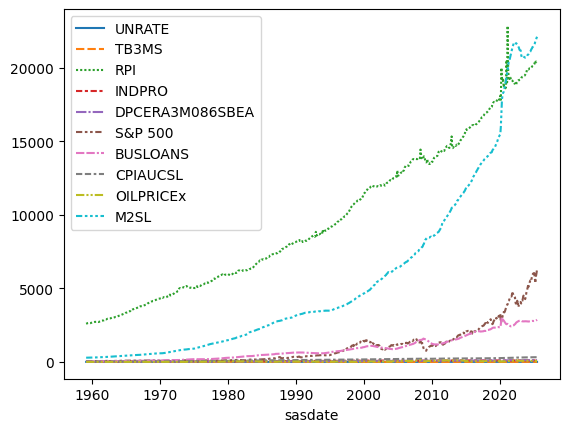

In [ ]:
# Plot every time series
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.lineplot(df)

We cannot see the evolution of some Time Series.

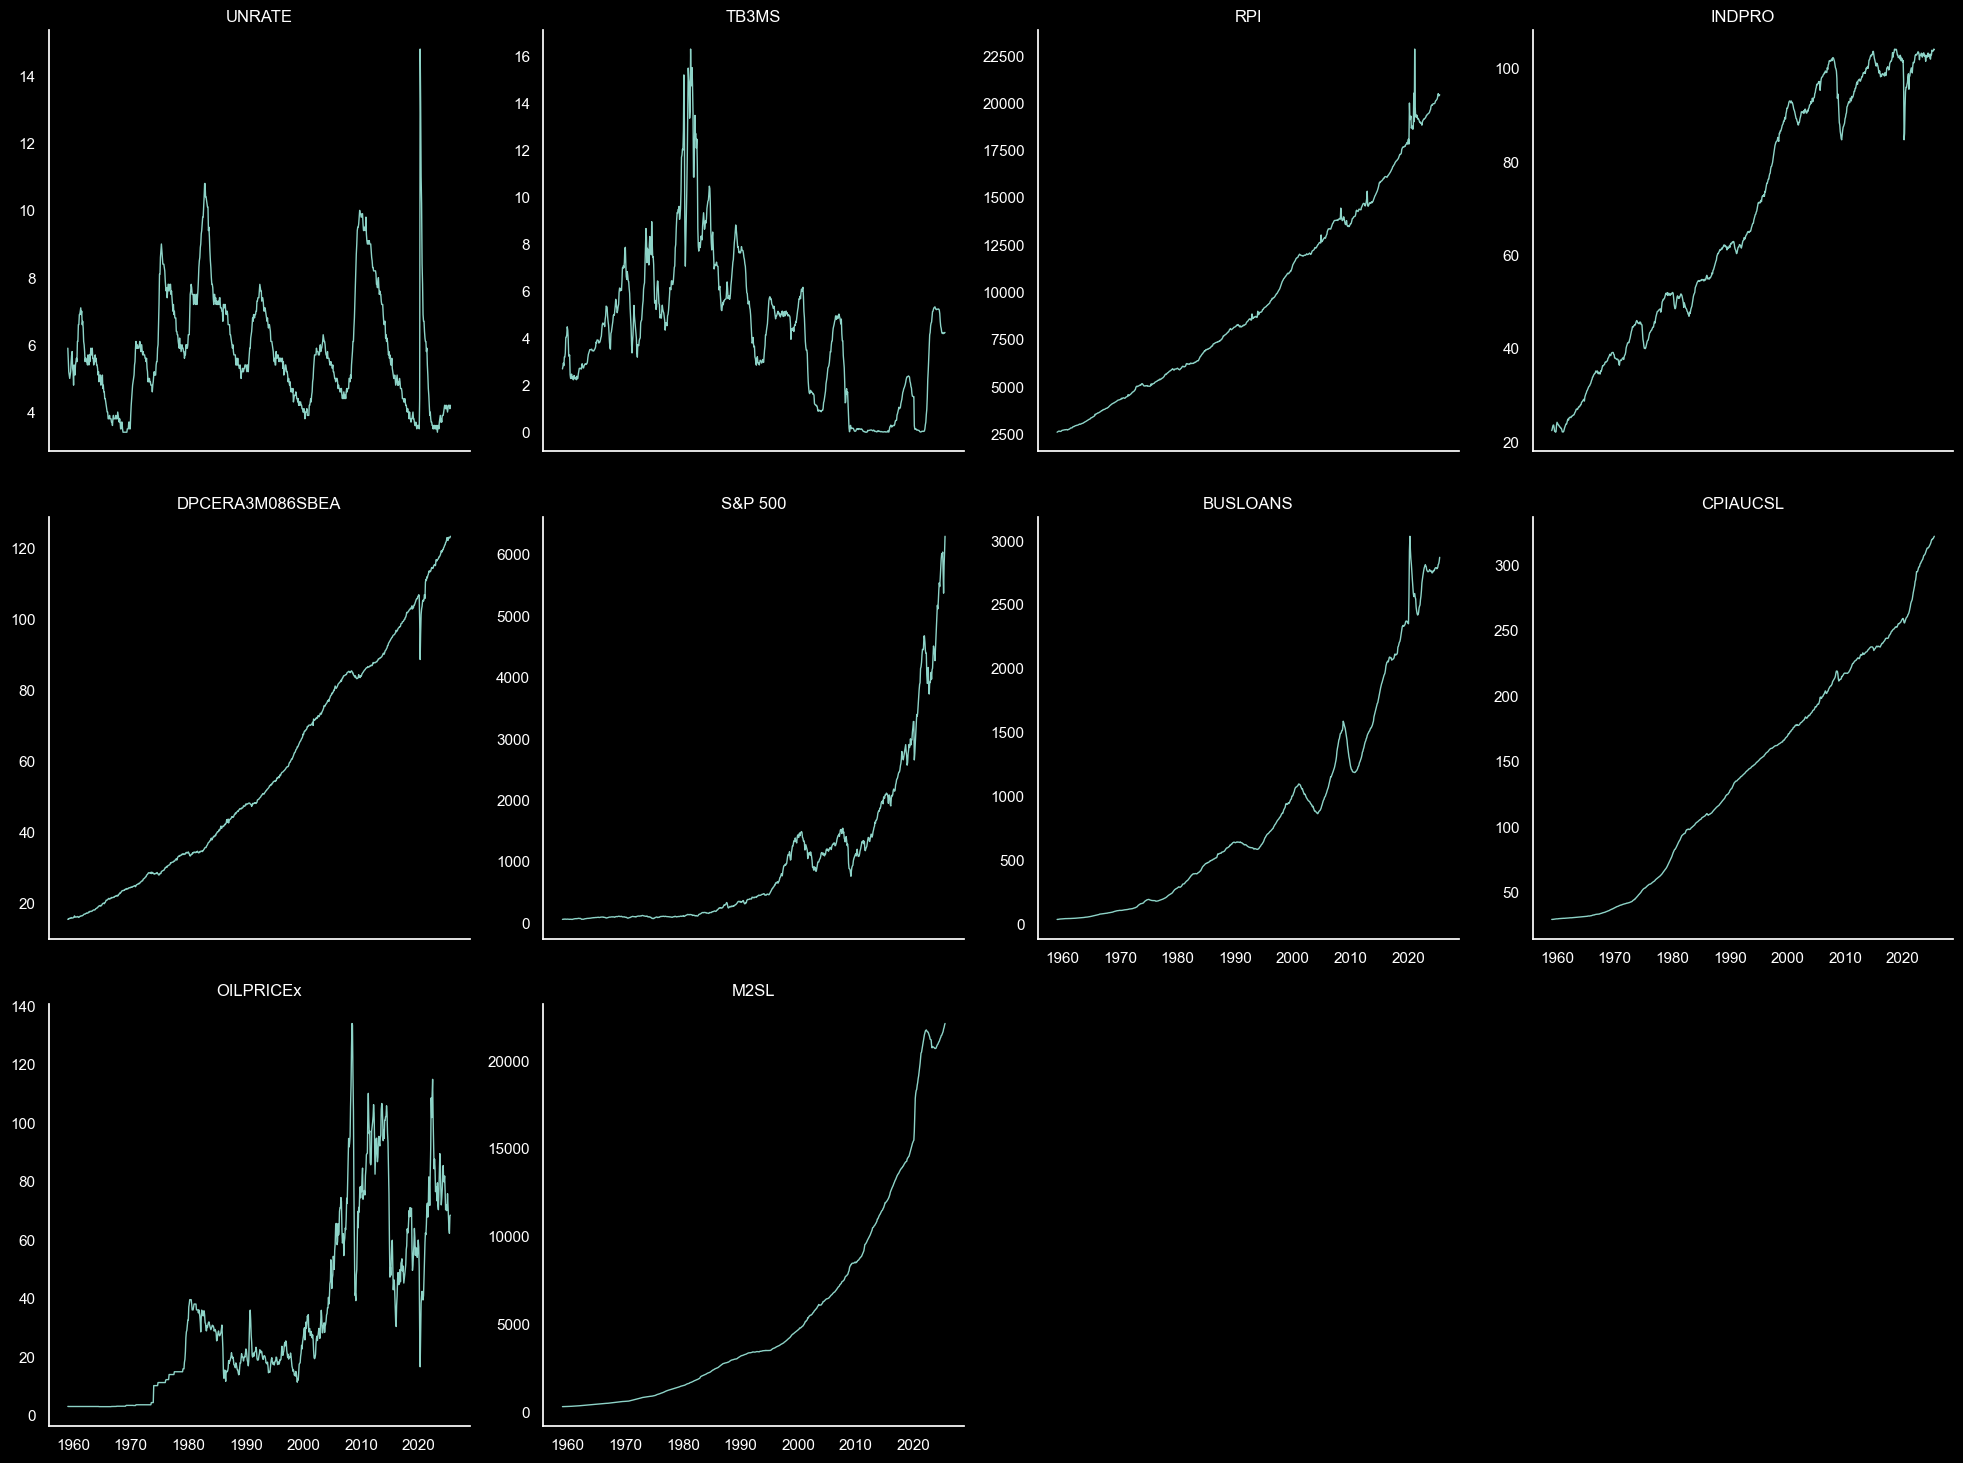

In [ ]:
plt.style.use("dark_background")

g = sns.relplot(
    data=df_long,
    x="sasdate", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False) 

plt.show()

Vu que le taux de chômage et le monthly treasure bill rate sont en pourcentage, ils sont très proche de l'état stationnaire (moyenne = 0  et variance stable). Le monthly treasure bill est un peu volatile. La variance commence à bouger sur l'OIL price tandis que la tendance à la hausse est la règle pour le reste. En clair, il faut analyser la stationnarité des données.

# Test the stationarity by ADF

In [67]:
result = {}

for col in df.columns :
    adf_test = adfuller(df[col]) 
    result[col] = {
       "ADF Statistic": adf_test[0],
        "p-value": adf_test[1],
        "lags used": adf_test[2],
        "nobs": adf_test[3] 
    }

In [69]:
# Conclusion
for col, stats in result.items():
    if stats["p-value"] < 0.05:
        print(col, "Stationary")
    else:
        print(col, "Non-stationary")

UNRATE Stationary
TB3MS Non-stationary
RPI Non-stationary
INDPRO Non-stationary
DPCERA3M086SBEA Non-stationary
S&P 500 Non-stationary
BUSLOANS Non-stationary
CPIAUCSL Non-stationary
OILPRICEx Non-stationary
M2SL Non-stationary


Comme attendu, le taux de chômage est stationnaire et que les autres séries temporelles ne le sont pas.

Vu qu'on veut prédire quand même le pourcentage d'évolution du taux de chômage mais non pas sa valeur en état, il faut le différencier. Pour les autres, c'est évident.

Maintenant, il faut déterminer exactement la cause de la non-stationnarité pour établir une stratégie de stationnarisation.

# Déterminons la cause de la non stationnarité